## Real Estate Predictor - Ridge and Lasso Regression
This module continues the previous one to predict the house price given a number of features. In the prior module, we applied artificial neural networks. In this one, wil will explore this task using ridge and lasso regression, which are regularization techinques ("desensitization" techniques) on our features to find the best weights for our regression. A very important concept here is the bias-variance trade-off. We will introduce a form of penalty, a bias, to our regression in order to better form a generalized model for our regression. This will help us for regression models that overfit.

### Import Packages & Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [2]:
house_df = pd.read_csv('kc_house_data.csv')

## Exploratory Data Analysis (EDA)

In [3]:
house_df.sample(5)

id             date     price  bedrooms  bathrooms  \
20845   993002108  20150330T000000  399995.0         3       1.50   
6383   5015000190  20140625T000000  690500.0         5       2.00   
12001  3423049269  20140513T000000  225000.0         4       1.50   
14409  1504800097  20140613T000000  513000.0         4       2.75   
7947   1545803520  20150126T000000  251000.0         3       2.00   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
20845         1140      1069     3.0           0     0  ...      8   
6383          2000      4211     1.5           0     2  ...      7   
12001         1950     12559     1.5           0     0  ...      6   
14409         2020      7070     1.0           0     0  ...      7   
7947          1650      7930     1.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
20845        1140              0      2005             0    98103  47.6907   
6383         1280            720      1908             0    98112  47.6283   
12001        1950              0      1939             0    98188  47.4364   
14409        1010           1010      1958             0    98126  47.5202   
7947         1650              0      1989             0    98038  47.3617   

          long  sqft_living15  sqft_lot15  
20845 -122.342           1230        1276  
6383  -122.301           1680        4000  
12001 -122.282           1950        9178  
14409 -122.378           1390        6000  
7947  -122.050           1510        7930  

[5 rows x 21 columns]

In [4]:
house_df.describe().transpose()

count          mean           std           min  \
id             21613.0  4.580302e+09  2.876566e+09  1.000102e+06   
price          21613.0  5.400881e+05  3.671272e+05  7.500000e+04   
bedrooms       21613.0  3.370842e+00  9.300618e-01  0.000000e+00   
bathrooms      21613.0  2.114757e+00  7.701632e-01  0.000000e+00   
sqft_living    21613.0  2.079900e+03  9.184409e+02  2.900000e+02   
sqft_lot       21613.0  1.510697e+04  4.142051e+04  5.200000e+02   
floors         21613.0  1.494309e+00  5.399889e-01  1.000000e+00   
waterfront     21613.0  7.541757e-03  8.651720e-02  0.000000e+00   
view           21613.0  2.343034e-01  7.663176e-01  0.000000e+00   
condition      21613.0  3.409430e+00  6.507430e-01  1.000000e+00   
grade          21613.0  7.656873e+00  1.175459e+00  1.000000e+00   
sqft_above     21613.0  1.788391e+03  8.280910e+02  2.900000e+02   
sqft_basement  21613.0  2.915090e+02  4.425750e+02  0.000000e+00   
yr_built       21613.0  1.971005e+03  2.937341e+01  1.900000e+03   
yr_renovated   21613.0  8.440226e+01  4.016792e+02  0.000000e+00   
zipcode        21613.0  9.807794e+04  5.350503e+01  9.800100e+04   
lat            21613.0  4.756005e+01  1.385637e-01  4.715590e+01   
long           21613.0 -1.222139e+02  1.408283e-01 -1.225190e+02   
sqft_living15  21613.0  1.986552e+03  6.853913e+02  3.990000e+02   
sqft_lot15     21613.0  1.276846e+04  2.730418e+04  6.510000e+02   

                        25%           50%           75%           max  
id             2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price          3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06  
bedrooms       3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
bathrooms      1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
sqft_living    1.427000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
sqft_lot       5.040000e+03  7.618000e+03  1.068800e+04  1.651359e+06  
floors         1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
waterfront     0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
view           0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition      3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
grade          7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
sqft_above     1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
sqft_basement  0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built       1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated   0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode        9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat            4.747100e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long          -1.223280e+02 -1.222300e+02 -1.221250e+02 -1.213150e+02  
sqft_living15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
sqft_lot15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05

In [5]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


### Visualizations

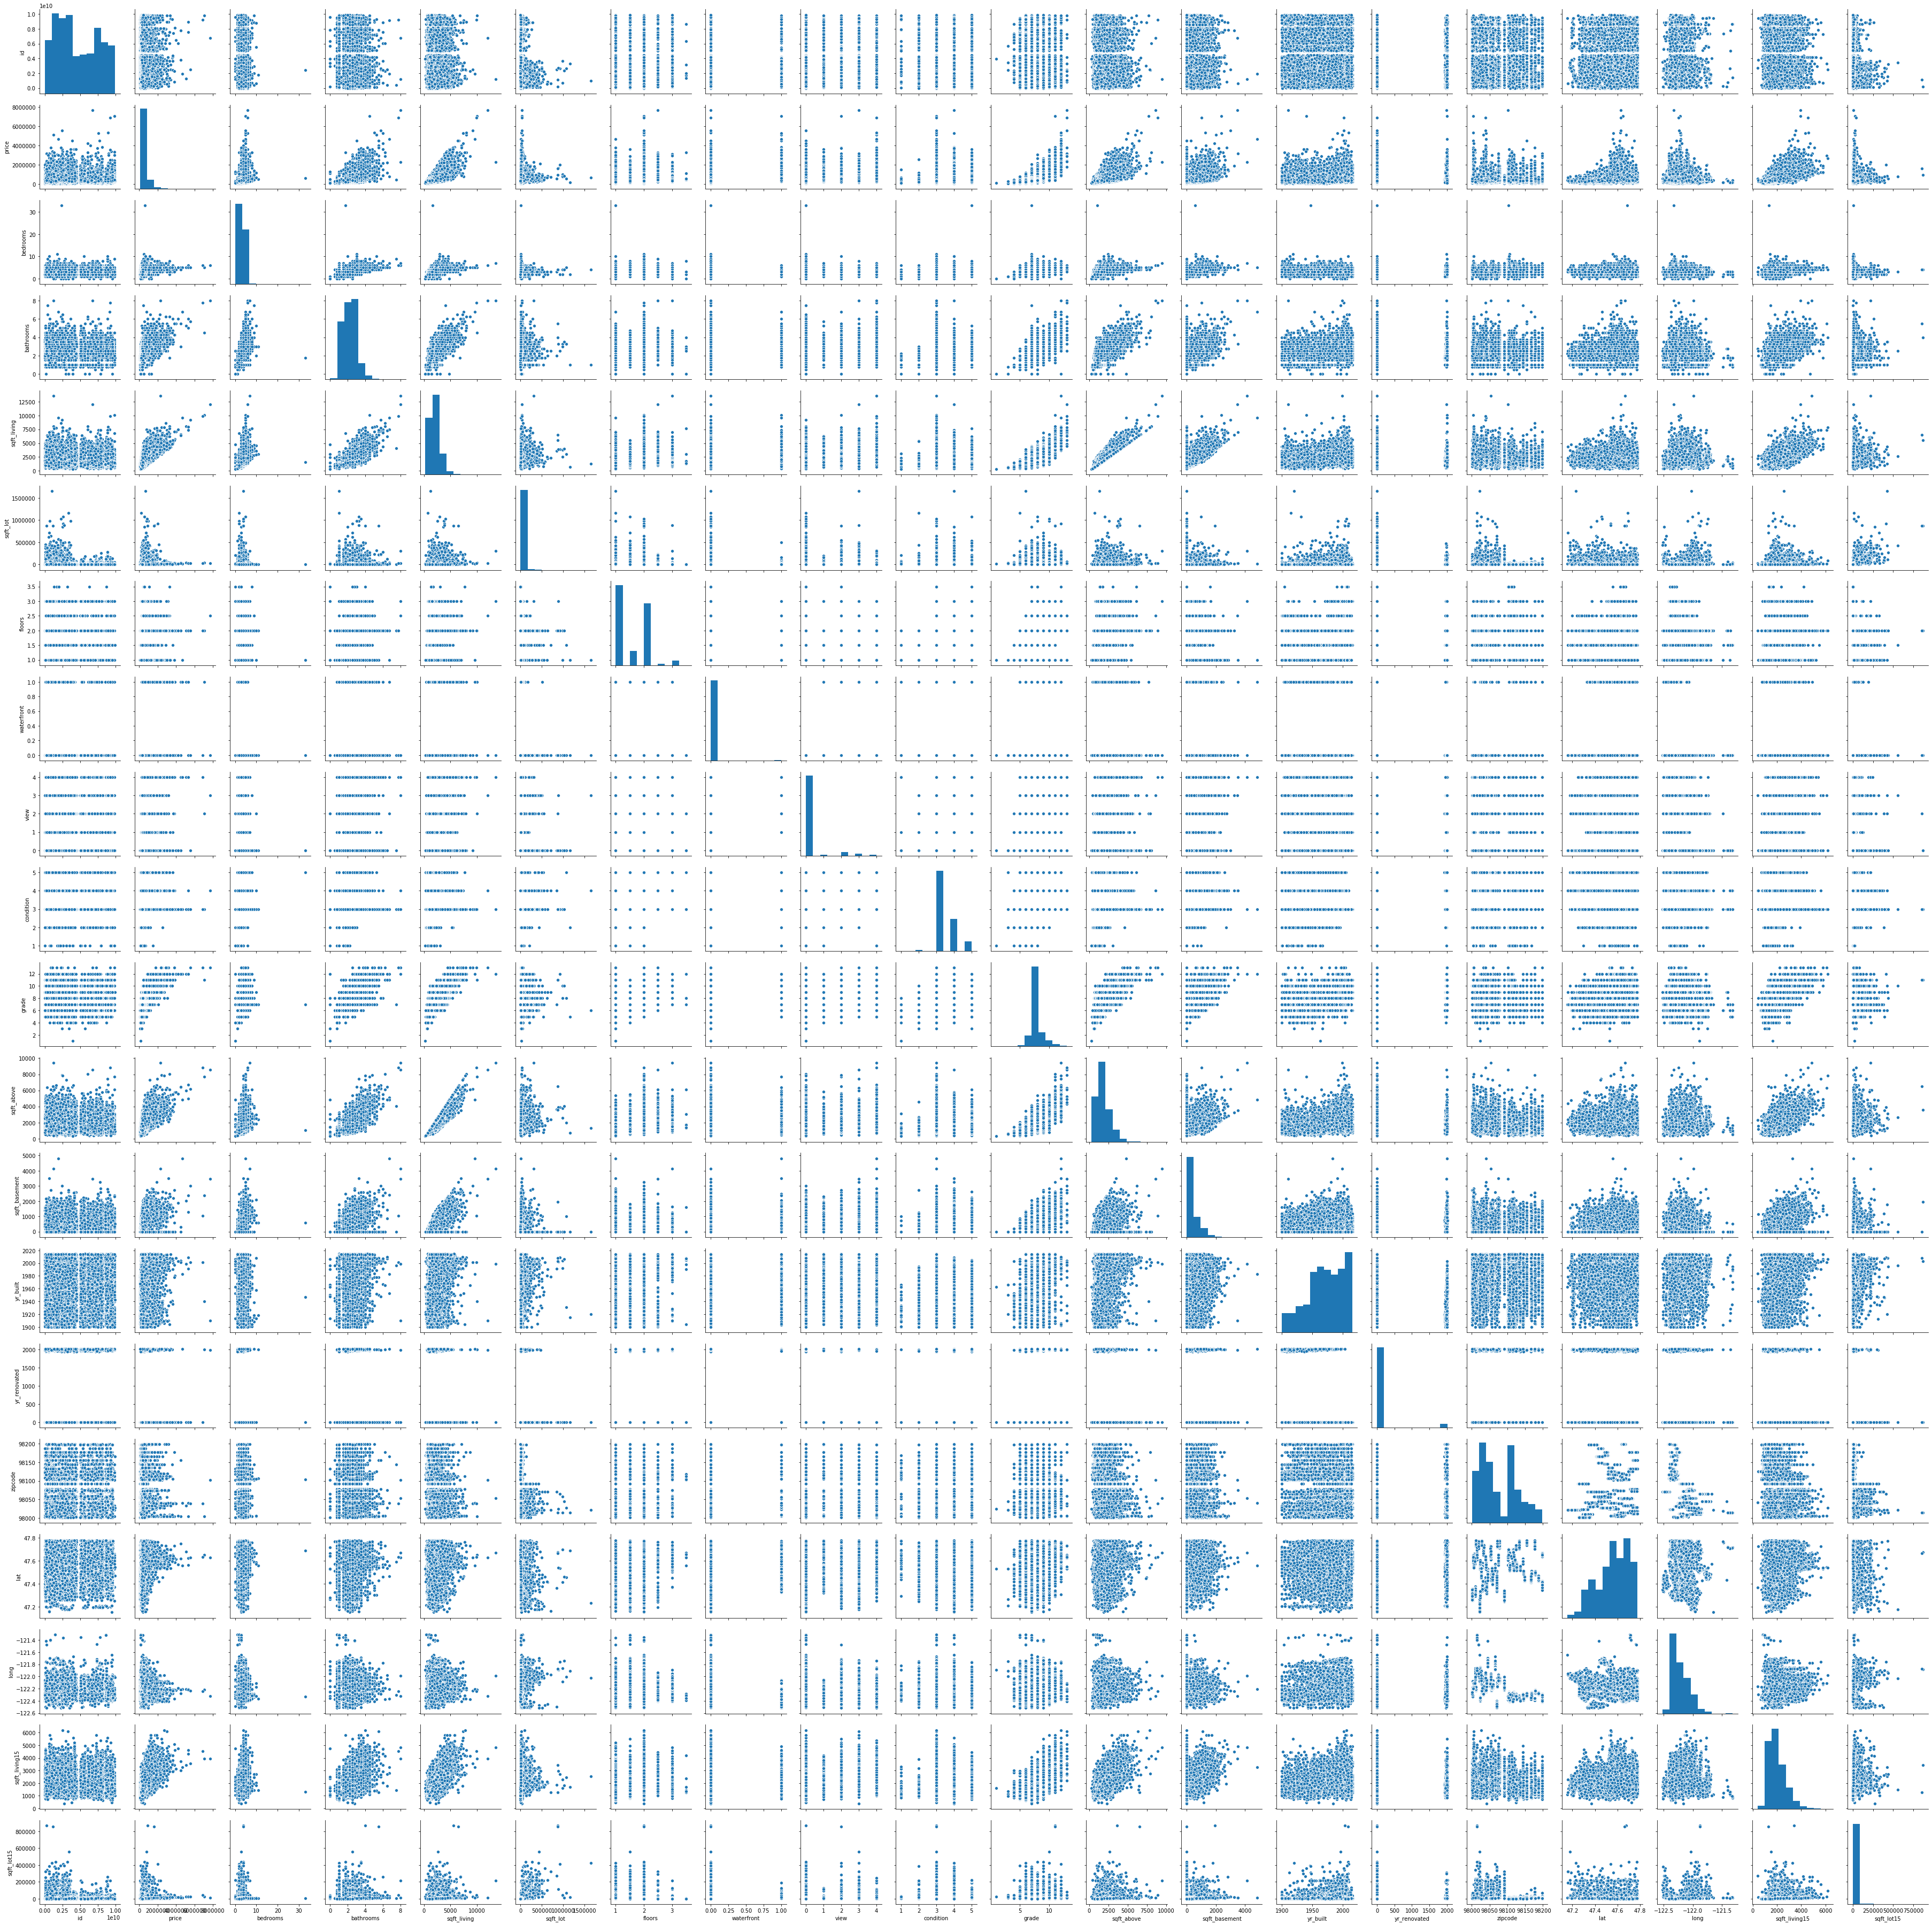

In [9]:
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built', 'yr_renovated']

sns.pairplot(house_df)
plt.show()

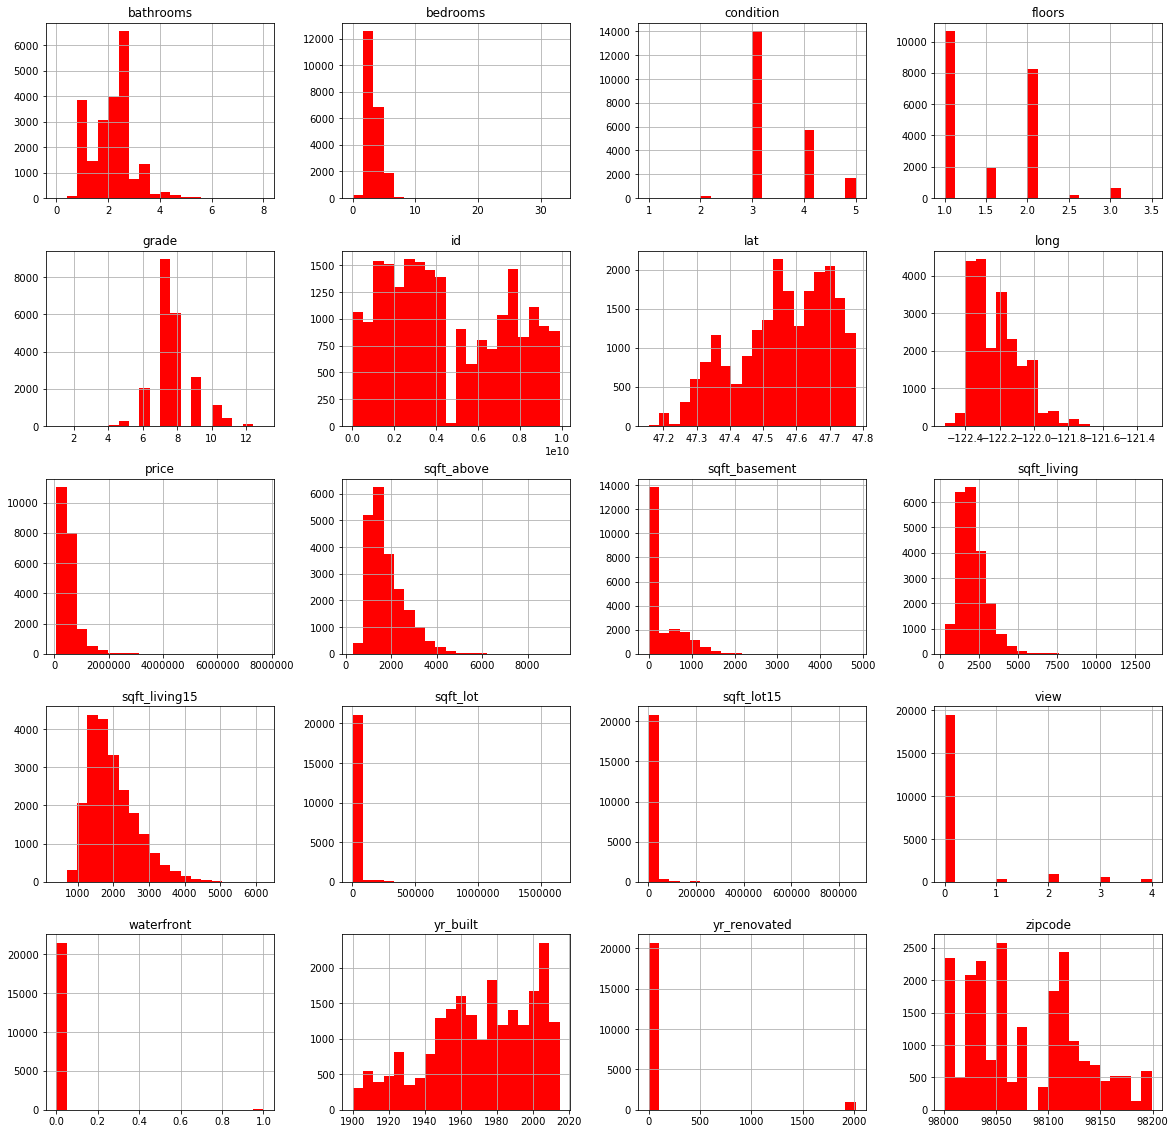

In [8]:
house_df.hist(bins=20,figsize=(20,20),color='r')
plt.show()

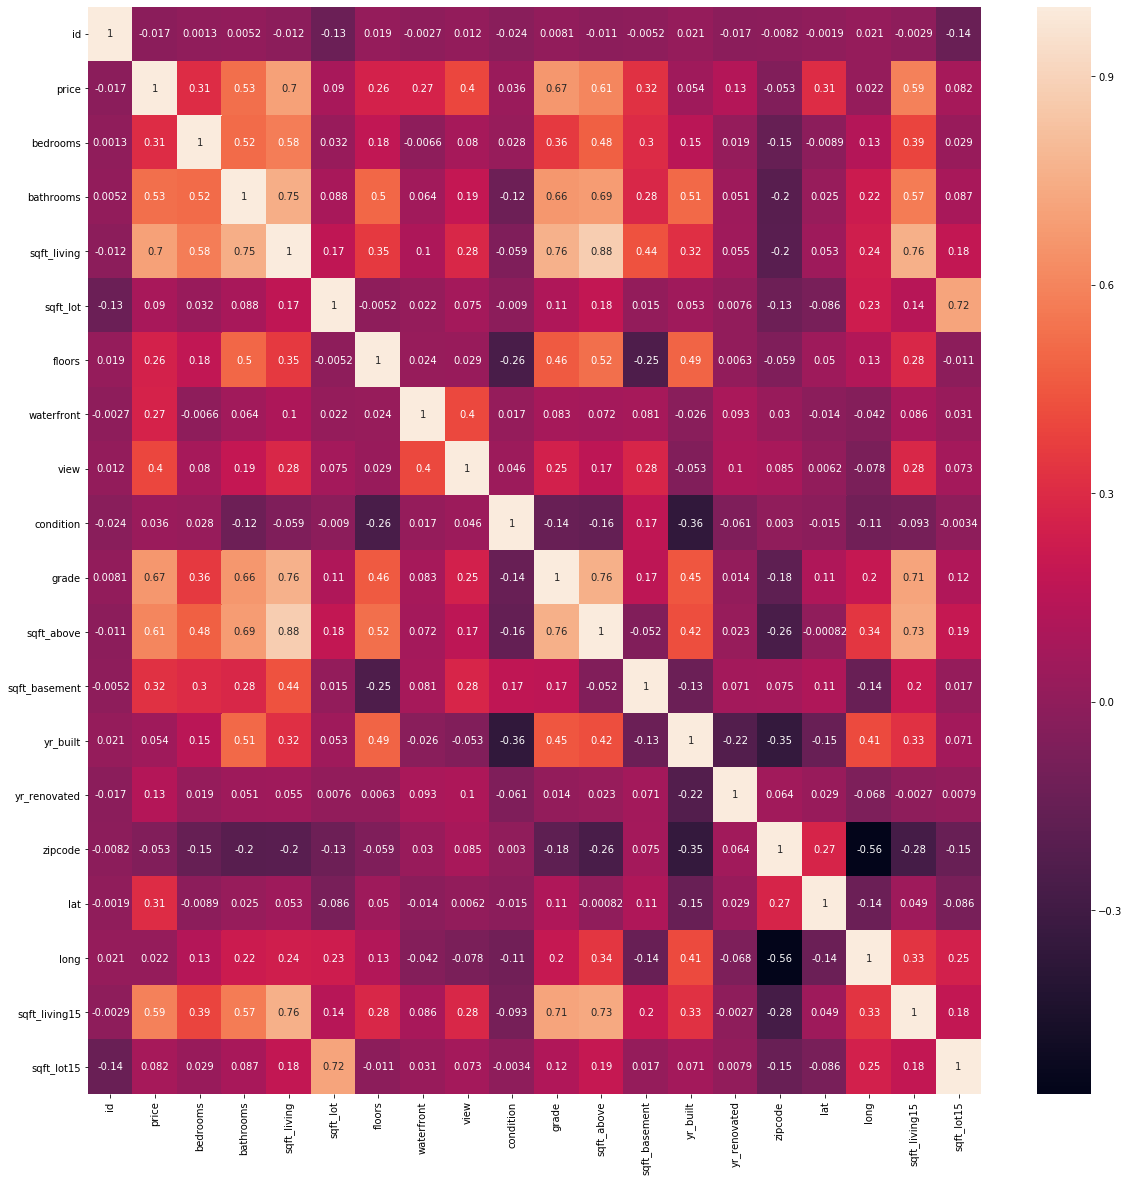

In [11]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(house_df.corr(), annot=True)
plt.show()

## Data Preprocessing

In [12]:
X = house_df.drop(['price', 'date', 'id'], axis=1)
y = house_df['price']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Training Main Linear Regression Model (OLS)

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
y_pred = regressor.predict(X_test)

In [22]:
print(f'Regression Intercept [b_0] = {regressor.intercept_}')
for i in np.arange(0, X_train.shape[1]):
    print(f'Regression Coefficient [b_{i+1}] = {regressor.coef_[i]}')

Regression Intercept [b_0] = 6353452.423500344
Regression Coefficient [b_1] = -33998.33843376527
Regression Coefficient [b_2] = 43884.15869255979
Regression Coefficient [b_3] = 108.697126996418
Regression Coefficient [b_4] = 0.09880209225640824
Regression Coefficient [b_5] = 5615.59511345348
Regression Coefficient [b_6] = 554806.8218134127
Regression Coefficient [b_7] = 54660.540344870315
Regression Coefficient [b_8] = 23594.78053438877
Regression Coefficient [b_9] = 94388.13972045339
Regression Coefficient [b_10] = 70.52591797632367
Regression Coefficient [b_11] = 38.171209103599594
Regression Coefficient [b_12] = -2645.5013876178023
Regression Coefficient [b_13] = 22.541896214481277
Regression Coefficient [b_14] = -551.9682737635767
Regression Coefficient [b_15] = 596472.7931820167
Regression Coefficient [b_16] = -196037.1233623826
Regression Coefficient [b_17] = 20.28697454168901
Regression Coefficient [b_18] = -0.3454059341137992


In [25]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

n = len(X_test)
k = X_test.shape[1]

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 210122.095 
MSE = 44151294752.41324 
MAE = 126536.82545372086 
R2 = 0.7048466077761724 
Adjusted R2 = 0.7038600226211067


## Model Training & Evaluation (Ridge Regression)

In [31]:
from sklearn.linear_model import Ridge
regressor_ridge = Ridge(alpha=100)
regressor_ridge.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [32]:
regressor = regressor_ridge
print(f'Regression Intercept [b_0] = {regressor.intercept_}')
for i in np.arange(0, X_train.shape[1]):
    print(f'Regression Coefficient [b_{i+1}] = {regressor.coef_[i]}')

Regression Intercept [b_0] = 7541484.673794769
Regression Coefficient [b_1] = -36154.482642497125
Regression Coefficient [b_2] = 44221.75473712769
Regression Coefficient [b_3] = 110.31003900655517
Regression Coefficient [b_4] = 0.04740955684744617
Regression Coefficient [b_5] = 12662.901830394057
Regression Coefficient [b_6] = 271080.72562915465
Regression Coefficient [b_7] = 63534.229922938066
Regression Coefficient [b_8] = 21348.123532003476
Regression Coefficient [b_9] = 99134.24582089733
Regression Coefficient [b_10] = 66.29371007855868
Regression Coefficient [b_11] = 44.016336966949964
Regression Coefficient [b_12] = -2924.7739683942564
Regression Coefficient [b_13] = 23.159513525902476
Regression Coefficient [b_14] = -381.27231414152436
Regression Coefficient [b_15] = 428813.562547127
Regression Coefficient [b_16] = -118857.3900765769
Regression Coefficient [b_17] = 19.480973273582617
Regression Coefficient [b_18] = -0.39001069783291464


In [33]:
y_pred = regressor.predict(X_test)

In [34]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

n = len(X_test)
k = X_test.shape[1]

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 214282.755 
MSE = 45917099004.342995 
MAE = 127637.10505642889 
R2 = 0.6930421268910033 
Adjusted R2 = 0.6920160838611125


## Model Training & Evaluation (Lasso Regression)

In [36]:
from sklearn.linear_model import Lasso
regressor_lasso = Lasso(alpha=500)
regressor_lasso.fit(X_train, y_train)

C:\Users\edcha\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 299888661130081.75, tolerance: 210410096861.09875
  positive)


Lasso(alpha=500, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [38]:
regressor = regressor_lasso
print(f'Regression Intercept [b_0] = {regressor.intercept_}')
for i in np.arange(0, X_train.shape[1]):
    print(f'Regression Coefficient [b_{i+1}] = {regressor.coef_[i]}')

Regression Intercept [b_0] = 6885548.9011361
Regression Coefficient [b_1] = -33524.077646195736
Regression Coefficient [b_2] = 42367.81151443715
Regression Coefficient [b_3] = 279.6881542511029
Regression Coefficient [b_4] = 0.07758189851533215
Regression Coefficient [b_5] = 5293.78340170843
Regression Coefficient [b_6] = 473890.98807032884
Regression Coefficient [b_7] = 57200.56968510041
Regression Coefficient [b_8] = 21794.635443994077
Regression Coefficient [b_9] = 95643.20586305621
Regression Coefficient [b_10] = -100.2502274864765
Regression Coefficient [b_11] = -129.96438066198291
Regression Coefficient [b_12] = -2716.125248636396
Regression Coefficient [b_13] = 23.065255948304415
Regression Coefficient [b_14] = -482.85956498824584
Regression Coefficient [b_15] = 564092.9996395773
Regression Coefficient [b_16] = -149972.11182726175
Regression Coefficient [b_17] = 18.680150321622335
Regression Coefficient [b_18] = -0.3684535970398839


In [39]:
y_pred = regressor.predict(X_test)

In [40]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

n = len(X_test)
k = X_test.shape[1]

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 210904.203 
MSE = 44480582759.403206 
MAE = 126425.11888684977 
R2 = 0.7026453026315163 
Adjusted R2 = 0.7016513593534044


## Model Training & Evaluation (Elastic Net Regression)

In [41]:
from sklearn.linear_model import ElasticNet
regressor_en = ElasticNet(alpha=500)
regressor_en.fit(X_train, y_train)

C:\Users\edcha\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 485695558851592.6, tolerance: 210410096861.09875
  positive)


ElasticNet(alpha=500, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [42]:
regressor = regressor_lasso
print(f'Regression Intercept [b_0] = {regressor.intercept_}')
for i in np.arange(0, X_train.shape[1]):
    print(f'Regression Coefficient [b_{i+1}] = {regressor.coef_[i]}')

Regression Intercept [b_0] = 6885548.9011361
Regression Coefficient [b_1] = -33524.077646195736
Regression Coefficient [b_2] = 42367.81151443715
Regression Coefficient [b_3] = 279.6881542511029
Regression Coefficient [b_4] = 0.07758189851533215
Regression Coefficient [b_5] = 5293.78340170843
Regression Coefficient [b_6] = 473890.98807032884
Regression Coefficient [b_7] = 57200.56968510041
Regression Coefficient [b_8] = 21794.635443994077
Regression Coefficient [b_9] = 95643.20586305621
Regression Coefficient [b_10] = -100.2502274864765
Regression Coefficient [b_11] = -129.96438066198291
Regression Coefficient [b_12] = -2716.125248636396
Regression Coefficient [b_13] = 23.065255948304415
Regression Coefficient [b_14] = -482.85956498824584
Regression Coefficient [b_15] = 564092.9996395773
Regression Coefficient [b_16] = -149972.11182726175
Regression Coefficient [b_17] = 18.680150321622335
Regression Coefficient [b_18] = -0.3684535970398839


In [43]:
y_pred = regressor.predict(X_test)

In [44]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

n = len(X_test)
k = X_test.shape[1]

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 210904.203 
MSE = 44480582759.403206 
MAE = 126425.11888684977 
R2 = 0.7026453026315163 
Adjusted R2 = 0.7016513593534044
